In [1]:
import numpy as np
from fractions import *

from time import perf_counter, time

import sys

sys.path.insert(1, "/Users/minhpham/Documents/Research/laughing-umbrella/xx_synthesis/monodromy")

import monodromy

from monodromy.coordinates import monodromy_alcove, monodromy_alcove_c2, monodromy_to_positive_canonical_polytope, rho_reflect
from monodromy.elimination import cylinderize, project
from monodromy.polytopes import *
from monodromy.static import qlr_polytope
from monodromy.method import *

from itertools import count

import os

import matplotlib.pyplot as plt

from scipy import stats

from functools import reduce
from itertools import combinations

from sympy import Matrix

/Users/minhpham/Documents/Research/laughing-umbrella/xx_synthesis/monodromy/lrslib-071b/lrs


In [27]:
def remove_duplicates(unhashable_list):
    unique_list = []
    for item in unhashable_list:
        if item not in unique_list:
            unique_list.append(item)
    return unique_list

In [31]:
monodromy_alcove_c2 = make_convex_polytope([
    [1, -2, -1, -1],
    [0,  0,  1,  1],
    [0,  1, -1,  0],
    [0,  0,  1, -1]
], name="A_PU(4)^monodromy")

grand_polytope_array = np.array([
    [1, -1, 0, 0, 0, 0, 0],
    [0, 1, -1, 0, 0, 0, 0],
    [0, 0, 1, -1, 0, 0, 0],
    [1, -1, -1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, -2, 0, 0], # alpha_i <= 1/2
    [1, 0, 0, 0, 0, -2, 0], 
    [1, 0, 0, 0, 0, 0, -2],
    [0, 0, 0, 0, 1, 0, 0],  # alpha_i >= 0
    [0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1],
]).T

grand_polytope_array = np.array([
    [1, -1, 0, 0, 0, 0],
    [0, 1, -1, 0, 0, 0],
    [0, 0, 1, -1, 0, 0],
    [1, -1, -1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [1, 0, 0, 0, -2, 0], # alpha_i <= 1/2
    [1, 0, 0, 0, 0, -2], 
    [1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0],  # alpha_i >= 0
    [0, 0, 0, 0, 0, 1],
]).T

grand_polytope_array.shape

(6, 10)

In [32]:
def compute_touching(polytope):
    global grand_polytope_array
    
    # Unpack the list of vertices from both convex components
    #vertices_list = reduce(lambda l1, l2: l1 + l2, polytope.vertices)
    vertices_list = polytope.vertices[0]

    # Remove redundant element and sort vertices list (48 from each becomes 73)
    vertices_array = np.array(sorted(remove_duplicates(vertices_list)))

    # Pad a column of 1 so it is of compatiable dimension
    vertices_array = np.hstack(
        [np.ones((vertices_array.shape[0], 1)), vertices_array])

    # Compute the touching matrix
    touching_matrix = np.matmul(vertices_array, grand_polytope_array)

    # Count the number of touching (zero entries)
    no_touching = np.dot(*touching_matrix.shape) - np.count_nonzero(touching_matrix)
    
    return no_touching, touching_matrix

In [162]:
start = Fraction(0, 1)
end = Fraction(1, 3)
num_points = 30

# Calculate the step size
step = (end-start) / (num_points)

# Generate the list of fractions
fractions_list = [start + i * step for i in range(num_points)]

In [163]:
touching_dict = dict()

for angle in fractions_list:
    if angle not in polytope_dict.keys():
        polytope_list = compute_polytope(3, angle)
        polytope_dict[angle] = polytope_list
        polytope = polytope_list[3]
    else:
        polytope = polytope_dict[angle][3]

    touching_dict[angle] = compute_touching(polytope)[0]

IndexError: list index out of range

In [36]:
touching_dict = dict()

for angle in sorted(polytope_dict.keys()):
    polytope = polytope_dict[angle][3]
    touching_dict[angle] = compute_touching(polytope)[0]

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 7)

KeyError: Fraction(0, 1)

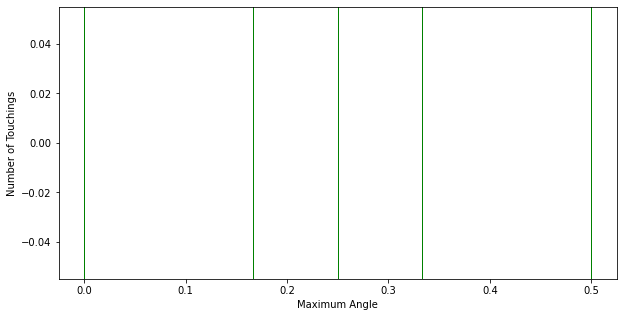

In [37]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(touching_dict.keys(), touching_dict.values(), s = 10)
ax.plot(touching_dict.keys(), touching_dict.values(), c = "orange")
ax.set_xlabel("Maximum Angle")
ax.set_ylabel("Number of Touchings")
ax.set_yscale("linear")
ax.axvline(0, c = "green", lw = 1)
ax.axvline(1/6, c = "green", lw = 1)
ax.axvline(1/4, c = "green", lw = 1)
ax.axvline(1/3, c = "green", lw = 1)
ax.axvline(1/2, c = "green", lw = 1)
ax.annotate(" 0", (Fraction(0, 6),  touching_dict[Fraction(0, 4)]))
ax.annotate(" 1/4", (Fraction(1, 4),  touching_dict[Fraction(1, 4)]))
ax.annotate(" 1/3", (Fraction(1, 3),  touching_dict[Fraction(1, 3)]))
ax.annotate(" 1/2", (Fraction(1, 2),  touching_dict[Fraction(1, 2)]))

In [2]:
sorted(polytope_dict.keys())

[Fraction(0, 1),
 Fraction(1, 87),
 Fraction(2, 87),
 Fraction(1, 29),
 Fraction(4, 87),
 Fraction(5, 87),
 Fraction(2, 29),
 Fraction(7, 87),
 Fraction(8, 87),
 Fraction(3, 29),
 Fraction(10, 87),
 Fraction(11, 87),
 Fraction(4, 29),
 Fraction(13, 87),
 Fraction(14, 87),
 Fraction(5, 29),
 Fraction(16, 87),
 Fraction(17, 87),
 Fraction(1, 5),
 Fraction(6, 29),
 Fraction(19, 87),
 Fraction(20, 87),
 Fraction(7, 29),
 Fraction(1, 4),
 Fraction(22, 87),
 Fraction(23, 87),
 Fraction(13, 48),
 Fraction(11, 40),
 Fraction(8, 29),
 Fraction(25, 87),
 Fraction(7, 24),
 Fraction(26, 87),
 Fraction(9, 29),
 Fraction(5, 16),
 Fraction(28, 87),
 Fraction(1, 3),
 Fraction(222223, 666667),
 Fraction(10003, 30000),
 Fraction(17, 48),
 Fraction(3, 8),
 Fraction(19, 48),
 Fraction(5, 12),
 Fraction(7, 16),
 Fraction(11, 24),
 Fraction(23, 48),
 Fraction(1, 2)]